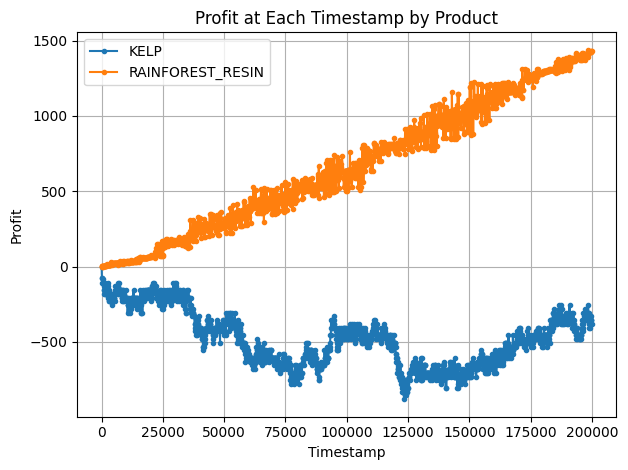

In [4]:
# Re-import necessary packages after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import re

# Reload the log file
log_path = "/Users/kgawande/Documents/Projects/aura-farmers/backtests/2025-04-08_09-24-20.log"
with open(log_path, "r") as f:
    lines = f.readlines()

# Extract timestamp, product, and profit
data = []
pattern = re.compile(r"RAINFOREST_RESIN|KELP")
for line in lines:
    if pattern.search(line):
        parts = line.strip().split(";")
        if len(parts) > 12:
            product = parts[2]
            timestamp = int(parts[1])
            try:
                profit = float(parts[-1])
                data.append((timestamp, product, profit))
            except ValueError:
                continue

# Create DataFrame
df = pd.DataFrame(data, columns=["Timestamp", "Product", "Profit"])
df.sort_values("Timestamp", inplace=True)

# Group by Timestamp and Product, then take the latest profit per timestamp
profit_by_product = df.groupby(["Timestamp", "Product"]).last().reset_index()


# Plot profit per timestamp
fig, ax = plt.subplots()
for product_name, group in profit_by_product.groupby("Product"):
    ax.plot(group["Timestamp"], group["Profit"], label=product_name, marker='.')

ax.set_title("Profit at Each Timestamp by Product")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Profit")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Round 1 Past Code

In [2]:
# Set the path to your log file
log_path = "/Users/kgawande/Documents/Projects/aura-farmers/backtests/2025-04-09_02-09-06.log"

# Read the log file; assume the delimiter is a semicolon
# If your file doesn't have a header, you can provide one using the 'names' parameter.
df = pd.read_csv(log_path, delimiter=";")

# Filter to only include rows for SQUID_INK
df_squid = df[df["product"] == "SQUID_INK"]

# For debugging, print the extracted PnL and timestamp columns
print(df_squid[["timestamp", "profit_and_loss"]])

# Plot PnL vs. Timestamp for SQUID_INK
plt.plot(df_squid["timestamp"], df_squid["profit_and_loss"], marker='o', linestyle='-')
plt.title("PNL of SQUID_INK")
plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 150006, saw 17


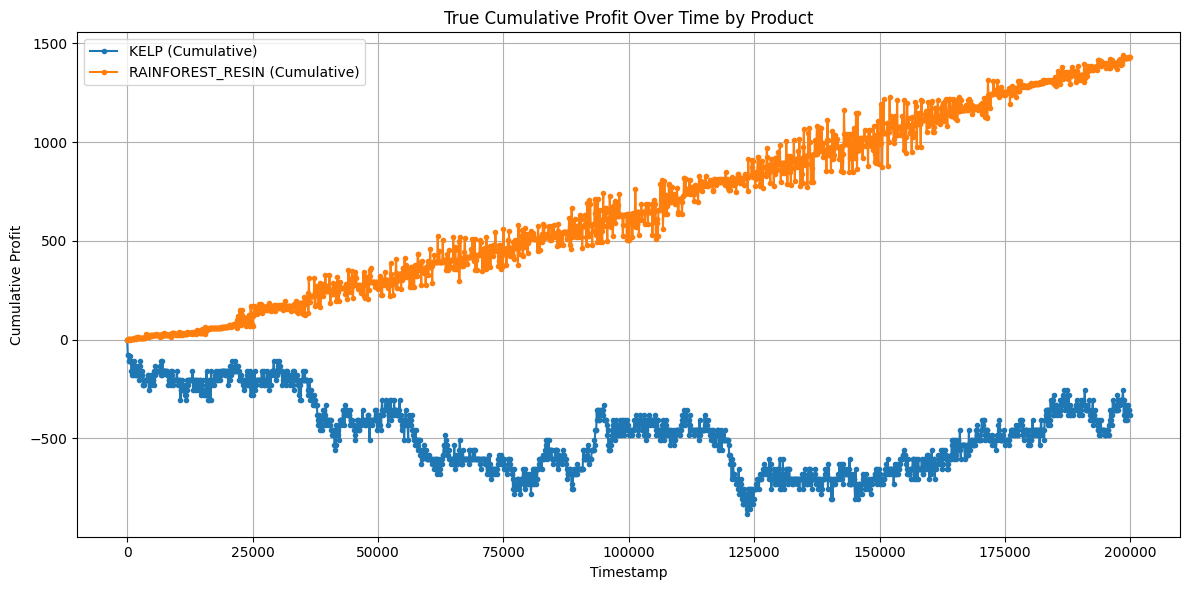

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Set the path to your log file
log_path = "/Users/kgawande/Downloads/d5a69084-ba9d-4544-8acc-3507f0c93d70_final.log"
with open(log_path, "r") as f:
    lines = f.readlines()

# Extract the timestamp, product, and profit for the three products.
# Updated regex to include all three products.
data = []
pattern = re.compile(r"RAINFOREST_RESIN|KELP|SQUID_INK")
for line in lines:
    if pattern.search(line):
        parts = line.strip().split(";")
        # Check that the line seems to be from the activities log with enough fields
        if len(parts) > 12:
            product = parts[2]
            try:
                timestamp = int(parts[1])
                profit = float(parts[-1])
                data.append((timestamp, product, profit))
            except ValueError:
                # Skip lines that don't have numeric timestamp or profit
                continue

# Create a DataFrame and sort by timestamp
df = pd.DataFrame(data, columns=["Timestamp", "Product", "Profit"])
df.sort_values("Timestamp", inplace=True)

# Group by Timestamp and Product and get the last profit of that timestamp (if there are multiple entries)
profit_by_product = df.groupby(["Timestamp", "Product"]).last().reset_index()

# Plot profit per timestamp for each product
fig, ax = plt.subplots(figsize=(10, 6))
for product_name, group in profit_by_product.groupby("Product"):
    ax.plot(group["Timestamp"], group["Profit"], label=product_name, marker='.')

ax.set_title("Profit at Each Timestamp by Product (SEASHELLS)")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Profit")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
